In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 3s 2us/step


In [4]:
print len(train_data)
print len(test_data)
print train_data[10]

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print decoded_newswire

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 328us/step - loss: 2.4981 - acc: 0.4910 - val_loss: 1.6770 - val_acc: 0.6510
Epoch 2/20
7982/7982 [==============================] - 2s 201us/step - loss: 1.3878 - acc: 0.7041 - val_loss: 1.2767 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 181us/step - loss: 1.0467 - acc: 0.7692 - val_loss: 1.1175 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.8231 - acc: 0.8282 - val_loss: 1.0218 - val_acc: 0.7770
Epoch 5/20
7982/7982 [==============================] - 2s 198us/step - loss: 0.6587 - acc: 0.8633 - val_loss: 0.9707 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 2s 192us/step - loss: 0.5241 - acc: 0.8928 - val_loss: 0.9208 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 2s 222us/step - loss: 0.4276 - acc: 0.9119 - val_loss: 0.9111 - val_acc: 0.8030


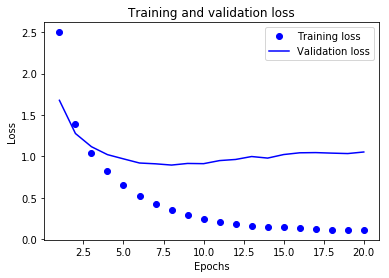

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

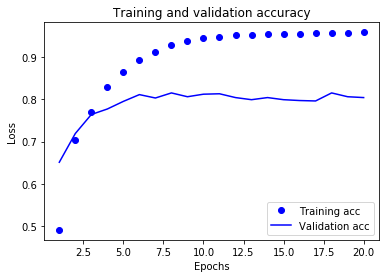

In [21]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 247us/step - loss: 2.5401 - acc: 0.5223 - val_loss: 1.6798 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 2s 243us/step - loss: 1.3789 - acc: 0.7095 - val_loss: 1.2812 - val_acc: 0.7230
Epoch 3/9
7982/7982 [==============================] - 2s 289us/step - loss: 1.0208 - acc: 0.7777 - val_loss: 1.1319 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 2s 281us/step - loss: 0.8007 - acc: 0.8257 - val_loss: 1.0534 - val_acc: 0.7620
Epoch 5/9
7982/7982 [==============================] - 2s 284us/step - loss: 0.6403 - acc: 0.8626 - val_loss: 0.9753 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 2s 235us/step - loss: 0.5121 - acc: 0.8933 - val_loss: 0.9114 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 302us/step - loss: 0.4119 - acc: 0.9143 - val_loss: 0.8949 - val_acc: 0.8240
Epoch 8

In [24]:
results

[1.0235380529826599, 0.77693677654461679]

In [25]:
predictions = model.predict(x_test)
print predictions[0].shape
print np.argmax(predictions[0])

(46,)
3


In [26]:
print np.array(train_labels)
print np.array(test_labels)

[ 3  4  3 ..., 25  3 25]
[ 3 10  1 ...,  3  3 24]
